In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
sys.path.insert(1, '/home/nicolas/code/src')
sys.path.insert(1, '/home/nicolas/code/data')

from RBM import RBM
from scipy.integrate import simps
from scipy import stats
import h5py

device = torch.device("cuda")
dtype = torch.float
torch.set_num_threads(4)

In [2]:
data = np.genfromtxt('../data/data_1d2c_bal_seed14.dat')
data = torch.tensor((data+1)/2, device = device, dtype = dtype)


In [3]:
data.shape

torch.Size([6000, 1000])

In [4]:

lr = 0.01
NGibbs = 100
annSteps = 0
mb_s = 600
num_pcd = 100
Nh = 20
Nv = data.shape[1]
ep_max = 10
w_hat = torch.linspace(0,1,steps=100)
_, S_d, V = torch.svd(data)
V0 = V[:,0]
N = 20000
it_mean = 50

In [5]:
myRBM = RBM(num_visible=Nv,
            num_hidden=Nh,
            device=device,
            lr=lr,
            gibbs_steps=NGibbs,
            UpdCentered=False,
            mb_s=mb_s,
            num_pcd=num_pcd,
            w_hat = w_hat,
            N = N,
            it_mean = it_mean,
            V = V,
            TMCLearning = True
           )

In [6]:
#myRBM.fit(data.T, ep_max)

In [7]:
f = h5py.File("../model/AllParametersTMCRBM_NGibbs_100_Nh20_Ns1000_Nmb600_Nepoch100_lr_0.01.h5", 'r')
myRBM.W = torch.tensor(f['W998'], device = myRBM.device)
myRBM.hbias = torch.tensor(f['hbias998'], device = myRBM.device)
myRBM.vbias = torch.tensor(f['vbias998'], device = myRBM.device)

In [11]:
vinit = torch.bernoulli(torch.rand(
        (myRBM.Nv, 1000), device=myRBM.device, dtype=myRBM.dtype))
si, _, _, _ = myRBM.Sampling(vinit, it_mcmc=100)


[]

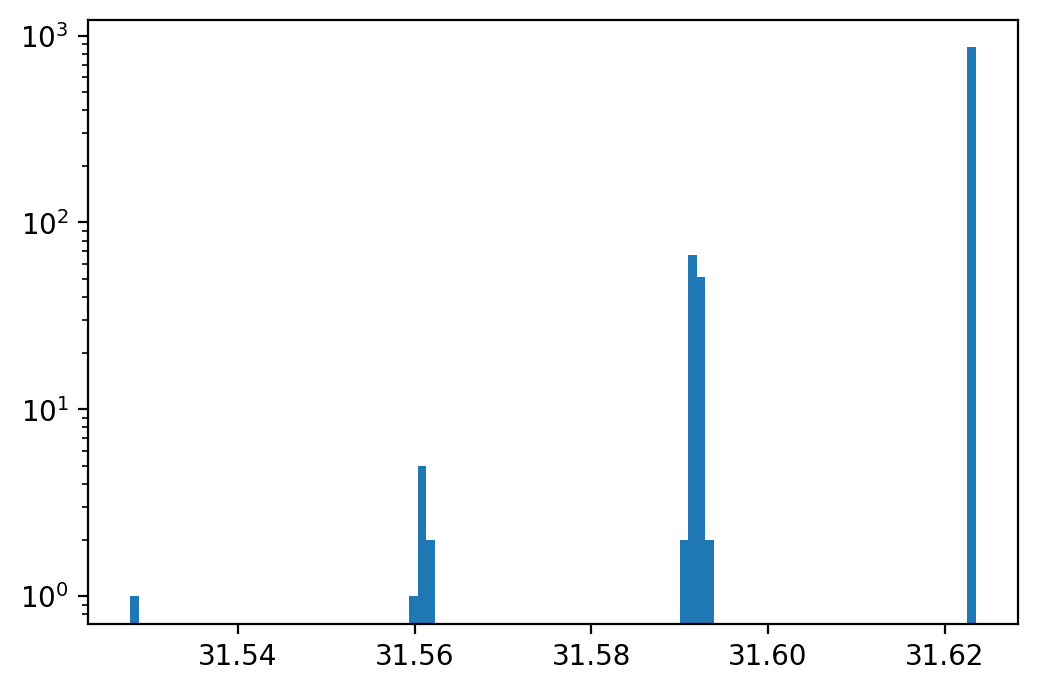

In [16]:
proj_gen = torch.mm(si, V)[:,0]
plt.figure(dpi = 200)
plt.hist(proj_gen.cpu().numpy(), bins = 100);
plt.semilogy()

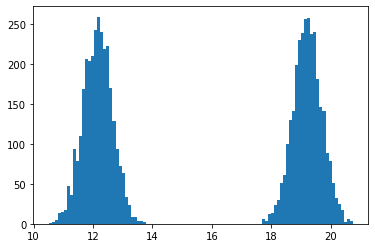

In [17]:
proj_data = torch.mm(data, V)[:,0]
plt.hist(proj_data.cpu().numpy(), bins = 100);

[]

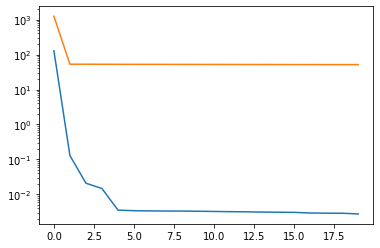

In [23]:
 _, S, _ = torch.svd(myRBM.W)
plt.plot(S.cpu())
plt.plot(S_d.cpu()[:len(S)])
plt.semilogy()

In [ ]:
plt.plot(S.cpu())
plt.plot(S_d.cpu())
plt.semilogy()